# Text Mining Assignment

- Khatiwada Angelina
- Data Science and Economics student
- ID: 943505

Feb 2021

## Part (a): Text data pre-processing

Corpus: The SMS Spam Collection v.1, a public set of SMS labeled messages that have been collected for mobile phone spam research. It has one collection composed by 5,574 English, real and non-enconded messages, tagged according being legitimate (ham) or spam.

Source: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

### Task 1

Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)
emails = pd.read_csv('SMSSpamCollection.txt', delimiter= '\t')
emails = pd.DataFrame(emails)
emails.columns = ["class", "text"]
emails 
# a lot of heterogeneity in data

,class,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
...,...,...
5566,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other suggestions?"
5569,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


Encoding categories (ham - 1; spam - 0)

In [3]:
emails['class'] = np.where(emails['class']=='ham',1,0)
emails.head()

,class,text
0,1,Ok lar... Joking wif u oni...
1,0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,1,U dun say so early hor... U c already then say...
3,1,"Nah I don't think he goes to usf, he lives around here though"
4,0,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


Visualizing the most frequent terms in ham and spam using wordcloud

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize(target):
    words = ''
    for msg in emails[emails['class'] == target]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='white').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  

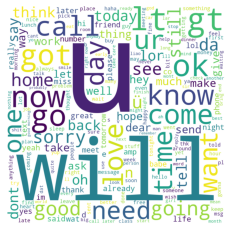

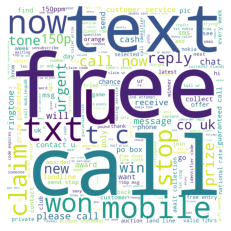

In [5]:
visualize(1) #ham
visualize(0) #spam

Downloading stopwords and punctuation disctionary from nltk

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords 
import string
stopword = stopwords.words("english")
stopword = stopword+ list(string.punctuation)
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Tokenizing corpus and eliminating punctuation and stop words

In [8]:
e_text = emails['text']

In [9]:
from nltk.tokenize import word_tokenize
result = []
for x in e_text:
    tok = [w for w in word_tokenize(x.lower())
              if w.isalpha() and w not in stopword]
    result.append(tok)
print(*result,sep='\n')

['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'valid', 'hours']
['mobile', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free']
['gon', 'na', 'home', 'soon', 'want', 'ta

['bloo', 'bloo', 'bloo', 'miss', 'first', 'bowl']
['lmao', 'fun']
['oh', 'k', 'k', 'big', 'good']
['hey', 'almost', 'forgot', 'happy', 'babe', 'love', 'ya']
['valentines', 'day', 'special', 'win', 'quiz', 'take', 'partner', 'trip', 'lifetime', 'send', 'go', 'rcvd']
['think', 'move', 'lt', 'gt', 'week']
['find', 'sent', 'offline', 'message', 'know', 'anjola']
['guess', 'first', 'time', 'created', 'web', 'page', 'read', 'wrote', 'waiting', 'opinions', 'want', 'friend']
['txting', 'driving']
['good', 'lets', 'thank', 'god', 'please', 'complete', 'drug', 'lots', 'water', 'beautiful', 'day']
['really', 'dun', 'bluff', 'leh', 'u', 'sleep', 'early', 'nite']
['indians', 'r', 'poor', 'india', 'poor', 'country', 'says', 'one', 'swiss', 'bank', 'directors', 'says', 'lt', 'gt', 'lac', 'crore', 'indian', 'money', 'deposited', 'swiss', 'banks', 'used', 'budget', 'lt', 'gt', 'yrs', 'give', 'lt', 'gt', 'crore', 'jobs', 'indians', 'village', 'delhi', 'lane', 'roads', 'forever', 'free', 'power', 'suply'

['ok', 'take']
['unlimited', 'texts', 'limited', 'minutes']
['double', 'mins', 'txts', 'orange', 'tariffs', 'latest', 'motorola', 'sonyericsson', 'nokia', 'bluetooth', 'free', 'call']
['problem', 'spending', 'lot', 'quality', 'time', 'together']
['urgent', 'attempt', 'contact', 'prize', 'yesterday', 'still', 'awaiting', 'collection', 'claim', 'call']
['heard', 'week']
['dear', 'dave', 'final', 'notice', 'collect', 'tenerife', 'holiday', 'cash', 'award', 'call', 'landline', 'tcs', 'sae']
['yes', 'last', 'practice']
['tells', 'u', 'call', 'claim', 'prize', 'u', 'enter', 'ur', 'mobile', 'personal', 'details', 'prompts', 'careful']
['thank', 'wonderful']
['otherwise', 'part', 'time', 'job']
['ü', 'mean', 'confirmed', 'tot', 'juz', 'say', 'oni', 'ok']
['okie']
['depends', 'would', 'like', 'treated']
['right', 'brah', 'see', 'later']
['waiting', 'e', 'car', 'mum', 'lor', 'u', 'leh', 'reach', 'home', 'already']
['account', 'shows', 'unredeemed', 'points', 'claim', 'call', 'identifier', 'code'

['common', 'hearin', 'r', 'u', 'wat', 'r', 'u', 'ur', 'day', 'let', 'ask', 'u', 'something', 'different', 'u', 'smile', 'today', 'gud', 'evng']
['hi', 'dear', 'call', 'urgnt', 'know', 'whats', 'problem', 'want', 'work', 'problem', 'least', 'tell', 'wating', 'reply']
['oh', 'yah', 'never', 'cancel', 'leh', 'haha']
['go', 'e', 'normal', 'pilates', 'intro']
['ok', 'let', 'u', 'noe', 'leave', 'house']
['oh', 'yes', 'like', 'torture', 'watching', 'england']
['wan', 'na', 'art']
['hopeing', 'pissed', 'remember', 'gone', 'sisters', 'something']
['got', 'takes', 'take', 'part', 'wrc', 'rally', 'oz', 'u', 'lucozade', 'energy', 'text', 'rally', 'le', 'see', 'packs', 'itcould', 'u']
['hi', 'sexychat', 'girls', 'waiting', 'text', 'text', 'great', 'night', 'chatting', 'send', 'stop', 'stop', 'service']
['good', 'morning', 'boytoy', 'yummy', 'lips', 'sexy', 'buns', 'think', 'crave', 'need']
['match', 'lt', 'gt']
['free', 'call', 'sir']
['hey', 'want', 'anything', 'buy']
['hey', 'babe', 'going', 'eve

Creating a list of bigrams 

In [10]:
bigrams_list =[]
for x in result:
    doc =[]
    bigrams = nltk.ngrams(x, n = 2)
    for grams in bigrams:
        doc.append(grams)
    bigrams_list.append(doc)
print(*bigrams_list,sep='\n') 

[('ok', 'lar'), ('lar', 'joking'), ('joking', 'wif'), ('wif', 'u'), ('u', 'oni')]
[('free', 'entry'), ('entry', 'wkly'), ('wkly', 'comp'), ('comp', 'win'), ('win', 'fa'), ('fa', 'cup'), ('cup', 'final'), ('final', 'tkts'), ('tkts', 'may'), ('may', 'text'), ('text', 'fa'), ('fa', 'receive'), ('receive', 'entry'), ('entry', 'question'), ('question', 'std'), ('std', 'txt'), ('txt', 'rate'), ('rate', 'c'), ('c', 'apply')]
[('u', 'dun'), ('dun', 'say'), ('say', 'early'), ('early', 'hor'), ('hor', 'u'), ('u', 'c'), ('c', 'already'), ('already', 'say')]
[('nah', 'think'), ('think', 'goes'), ('goes', 'usf'), ('usf', 'lives'), ('lives', 'around'), ('around', 'though')]
[('freemsg', 'hey'), ('hey', 'darling'), ('darling', 'week'), ('week', 'word'), ('word', 'back'), ('back', 'like'), ('like', 'fun'), ('fun', 'still'), ('still', 'tb'), ('tb', 'ok'), ('ok', 'xxx'), ('xxx', 'std'), ('std', 'chgs'), ('chgs', 'send'), ('send', 'rcv')]
[('even', 'brother'), ('brother', 'like'), ('like', 'speak'), ('sp

[('hmmm', 'k'), ('k', 'want'), ('want', 'change'), ('change', 'field'), ('field', 'quickly'), ('quickly', 'da'), ('da', 'wan'), ('wan', 'na'), ('na', 'get'), ('get', 'system'), ('system', 'administrator'), ('administrator', 'network'), ('network', 'administrator')]
[('free', 'ringtone'), ('ringtone', 'text'), ('text', 'first'), ('first', 'poly'), ('poly', 'text'), ('text', 'get'), ('get', 'true'), ('true', 'tone'), ('tone', 'help'), ('help', 'free'), ('free', 'tones'), ('tones', 'txt'), ('txt', 'stop')]
[('dear', 'chechi'), ('chechi', 'talk')]
[('hair', 'cream'), ('cream', 'shipped')]
[('none', 'happening'), ('happening', 'til'), ('til', 'get'), ('get', 'though')]
[('yep', 'great'), ('great', 'loxahatchee'), ('loxahatchee', 'xmas'), ('xmas', 'tree'), ('tree', 'burning'), ('burning', 'lt'), ('lt', 'gt'), ('gt', 'starts'), ('starts', 'hour')]
[('haha', 'get'), ('get', 'used'), ('used', 'driving'), ('driving', 'usf'), ('usf', 'man'), ('man', 'know'), ('know', 'lot'), ('lot', 'stoners')]
[

[('crazy', 'ar'), ('ar', 'married'), ('married', 'ü'), ('ü', 'like'), ('like', 'gd'), ('gd', 'looking'), ('looking', 'guys'), ('guys', 'frens'), ('frens', 'like'), ('like', 'say'), ('say', 'korean'), ('korean', 'leona'), ('leona', 'fave'), ('fave', 'dun'), ('dun', 'thk'), ('thk', 'aft'), ('aft', 'thinking'), ('thinking', 'mayb'), ('mayb', 'prob'), ('prob', 'go')]
[('somewhere', 'fredericksburg')]
[('que', 'pases'), ('pases', 'un'), ('un', 'buen'), ('buen', 'tiempo'), ('tiempo', 'something'), ('something', 'like')]
[('ok', 'stay'), ('stay', 'night'), ('night', 'xavier'), ('xavier', 'sleeping'), ('sleeping', 'bag'), ('bag', 'getting'), ('getting', 'tired')]
[('doesnt', 'need'), ('need', 'test')]
[('nothing', 'much'), ('much', 'chillin'), ('chillin', 'home'), ('home', 'super'), ('super', 'bowl'), ('bowl', 'plan')]
[('sexy', 'st'), ('st', 'george'), ('george', 'day'), ('day', 'pic'), ('pic', 'jordan'), ('jordan', 'txt'), ('txt', 'pic'), ('pic', 'dont'), ('dont', 'miss'), ('miss', 'every'),

[('comingdown', 'later')]
[('super', 'da'), ('da', 'good'), ('good', 'replacement'), ('replacement', 'murali')]
[('da', 'good'), ('good', 'good'), ('good', 'unsold')]
[('hi', 'u'), ('u', 'want'), ('want', 'join'), ('join', 'sts'), ('sts', 'later'), ('later', 'meeting'), ('meeting', 'five'), ('five', 'call'), ('call', 'u'), ('u', 'class')]
[('engalnd', 'telly'), ('telly', 'decided'), ('decided', 'wo'), ('wo', 'let'), ('let', 'watch'), ('watch', 'mia'), ('mia', 'elliot'), ('elliot', 'kissing'), ('kissing', 'damn')]
[('free', 'nokia'), ('nokia', 'motorola'), ('motorola', 'upto'), ('upto', 'linerental'), ('linerental', 'free'), ('free', 'mins'), ('mins', 'free'), ('free', 'call'), ('call', 'call')]
[('dont', 'want'), ('want', 'hear'), ('hear', 'philosophy'), ('philosophy', 'say'), ('say', 'happen')]
[('got', 'job'), ('job', 'wipro'), ('wipro', 'get'), ('get', 'every'), ('every', 'thing'), ('thing', 'life'), ('life', 'years')]
[('cant', 'get'), ('get', 'da'), ('da', 'laptop'), ('laptop', 'm

[('aathi', 'dear')]
[('tunji', 'queen'), ('queen', 'wishing'), ('wishing', 'great'), ('great', 'day'), ('day', 'abiola')]
[('today', 'iz'), ('iz', 'yellow'), ('yellow', 'rose'), ('rose', 'day'), ('day', 'u'), ('u', 'love'), ('love', 'frndship'), ('frndship', 'give'), ('give', 'misscall'), ('misscall', 'amp'), ('amp', 'send'), ('send', 'ur'), ('ur', 'frndz'), ('frndz', 'amp'), ('amp', 'see'), ('see', 'many'), ('many', 'miss'), ('miss', 'calls'), ('calls', 'u'), ('u', 'get'), ('get', 'u'), ('u', 'get'), ('get', 'u'), ('u', 'marry'), ('marry', 'ur'), ('ur', 'lover')]
[('class', 'hours'), ('hours', 'sorry')]
[('wat', 'time'), ('time', 'u'), ('u', 'finish'), ('finish', 'ur'), ('ur', 'lect'), ('lect', 'today')]
[('jamster', 'get'), ('get', 'crazy'), ('crazy', 'frog'), ('frog', 'sound'), ('sound', 'poly'), ('poly', 'text'), ('text', 'real'), ('real', 'text'), ('text', 'crazy'), ('crazy', 'sounds'), ('sounds', 'c'), ('c', 'apply')]
[('sad', 'story'), ('story', 'man'), ('man', 'last'), ('last',

[('hey', 'tmr'), ('tmr', 'maybe'), ('maybe', 'meet'), ('meet', 'yck')]
[('alrite', 'sam'), ('sam', 'nic'), ('nic', 'checkin'), ('checkin', 'ur')]
[('making', 'easy'), ('easy', 'pay'), ('pay', 'back'), ('back', 'lt'), ('lt', 'gt'), ('gt', 'yrs'), ('yrs', 'say'), ('say', 'pay'), ('pay', 'back'), ('back', 'earlier'), ('earlier', 'get')]
[('worry', 'sure'), ('sure', 'get')]
[('gas', 'station'), ('station', 'like'), ('like', 'block'), ('block', 'away'), ('away', 'house'), ('house', 'drive'), ('drive', 'right'), ('right', 'since'), ('since', 'armenia'), ('armenia', 'ends'), ('ends', 'swann'), ('swann', 'take'), ('take', 'howard')]
[('someone', 'u'), ('u', 'know'), ('know', 'asked'), ('asked', 'dating'), ('dating', 'service'), ('service', 'contact'), ('contact', 'cant'), ('cant', 'guess'), ('guess', 'call'), ('call', 'revealed'), ('revealed', 'pobox')]
[('camera', 'awarded'), ('awarded', 'sipix'), ('sipix', 'digital'), ('digital', 'camera'), ('camera', 'call'), ('call', 'fromm'), ('fromm', 'l

[('ü', 'write'), ('write', 'wat')]
[('ha', 'would'), ('would', 'say'), ('say', 'read'), ('read', 'anything'), ('anything', 'way'), ('way', 'u'), ('u', 'seemed'), ('seemed', 'like'), ('like', 'judgemental'), ('judgemental', 'save'), ('save', 'fridays'), ('fridays', 'pub')]
[('valentine', 'game'), ('game', 'send'), ('send', 'dis'), ('dis', 'msg'), ('msg', 'ur'), ('ur', 'friends'), ('friends', 'answers'), ('answers', 'r'), ('r', 'someone'), ('someone', 'really'), ('really', 'loves'), ('loves', 'colour'), ('colour', 'suits'), ('suits', 'best')]
[('hi', 'asked'), ('asked', 'waheeda'), ('waheeda', 'fathima'), ('fathima', 'leave')]
[('enjoy', 'urself'), ('urself', 'tmr')]
[('still', 'around'), ('around', 'could'), ('could', 'use')]
[('u', 'secret'), ('secret', 'admirer'), ('admirer', 'looking'), ('looking', 'make'), ('make', 'contact'), ('contact', 'r'), ('r', 'reveal'), ('reveal', 'thinks'), ('thinks', 'ur')]
[('give', 'us'), ('us', 'back'), ('back', 'id'), ('id', 'proof'), ('proof', 'lt'), 

[('stuck', 'da'), ('da', 'middle'), ('middle', 'da'), ('da', 'row'), ('row', 'da'), ('da', 'right'), ('right', 'hand'), ('hand', 'side'), ('side', 'da'), ('da', 'lt')]
[('laid', 'airtel'), ('airtel', 'line'), ('line', 'rest')]
[('hi', 'u'), ('u', 'decide'), ('decide', 'wot'), ('wot', 'get'), ('get', 'bday'), ('bday', 'ill'), ('ill', 'prob'), ('prob', 'jus'), ('jus', 'get'), ('get', 'voucher'), ('voucher', 'frm'), ('frm', 'virgin'), ('virgin', 'sumfing')]
[('freemsg', 'txt'), ('txt', 'call'), ('call', 'claim'), ('claim', 'reward'), ('reward', 'hours'), ('hours', 'talk'), ('talk', 'time'), ('time', 'use'), ('use', 'phone'), ('phone', 'inc'), ('inc', 'stop'), ('stop', 'txtstop')]
[('hey', 'j'), ('j', 'r'), ('r', 'u'), ('u', 'feeling'), ('feeling', 'better'), ('better', 'hopeso'), ('hopeso', 'hunny'), ('hunny', 'amnow'), ('amnow', 'feelin'), ('feelin', 'ill'), ('ill', 'ithink'), ('ithink', 'may'), ('may', 'tonsolitusaswell'), ('tonsolitusaswell', 'damn'), ('damn', 'iam'), ('iam', 'layin'),

### Task  2

Splititng original corpus in sentences

In [11]:
sent=[]
for x in e_text:
    s = nltk.sent_tokenize(x)
    sent.append(s)
print(*sent,sep='\n')

['Ok lar...', 'Joking wif u oni...']
['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
['U dun say so early hor... U c already then say...']
["Nah I don't think he goes to usf, he lives around here though"]
["FreeMsg Hey there darling it's been 3 week's now and no word back!", "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, £1.50 to rcv']
['Even my brother is not like to speak with me.', 'They treat me like aids patent.']
["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.", 'Press *9 to copy your friends Callertune']
['WINNER!!', 'As a valued network customer you have been selected to receivea £900 prize reward!', 'To claim call 09061701461.', 'Claim code KL341.', 'Valid 12 hours only.']
['Had your mobile 11 months or more?', 'U R entitled to Update to the latest colour mobiles 

['Not heard from U4 a while.', 'Call 4 rude chat private line 01223585334 to cum.', 'Wan 2C pics of me gettin shagged then text PIX to 8552.', '2End send STOP 8552 SAM xxx']
['Ok .', '.', 'now i am in bus.', '.', 'If i come soon i will come otherwise tomorrow']
['I cant pick the phone right now.', 'Pls send a message']
['<Forwarded from 88877>FREE entry into our £250 weekly comp just send the word ENTER to 88877 NOW.', '18 T&C www.textcomp.com']
['Finish liao... U?']
['88066 FROM 88066 LOST 3POUND HELP']
['Haha i think i did too']
['U know we watchin at lido?']
['Life spend with someone for a lifetime may be meaningless but a few moments spent with someone who really love you means more than life itself..']
["Haha awesome, I've been to 4u a couple times.", "Who all's coming?"]
['Cold.', 'Dont be sad dear']
['Think I could stop by in like an hour or so?', "My roommate's looking to stock up for a trip"]
['Is that on the telly?', 'No its Brdget Jones!']
['Love you aathi..love u lot..']
['

['FREE for 1st week!', 'No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+']
['K.i will send in  &lt;#&gt;  min:)']
['Would me smoking you out help us work through this difficult time']
['Someone U know has asked our dating service 2 contact you!', 'Cant guess who?', 'CALL 09058095107 NOW all will be revealed.', 'POBox 7, S3XY 150p']
['Yes.mum lookin strong:)']
['Sir Goodmorning, Once free call me.']
['Where are you call me.']
['Was gr8 to see that message.', 'So when r u leaving?', 'Congrats dear.', 'What school and wat r ur plans.']
['Love it!', 'The girls at the office may wonder why you are smiling but sore...']
['Hi, wlcome back, did wonder if you got eaten by a lion or something, nothing much']
['Does uncle timi help in clearing cars']
['I came hostel.', 'I m going to sleep.', 'Plz call me up before class.', 'Hrishi.']
['Ok...', 'But bag again..']
['Hi!', "You just spoke to MANEESHA V. We'd l

["K I'll head out in a few mins, see you there"]
['Do u konw waht is rael FRIENDSHIP Im gving yuo an exmpel: Jsut ese tihs msg.. Evrey splleing of tihs msg is wrnog.. Bt sitll yuo can raed it wihtuot ayn mitsake.. GOODNIGHT &amp; HAVE A NICE SLEEP..SWEET DREAMS..']
['I cant pick the phone right now.', 'Pls send a message']
["I don't want you to leave.", "But i'm barely doing what i can to stay sane.", "fighting with you constantly isn't helping."]
['The current leading bid is 151.', 'To pause this auction send OUT.', 'Customer Care: 08718726270']
['Free entry to the gr8prizes wkly comp 4 a chance to win the latest Nokia 8800, PSP or £250 cash every wk.TXT GREAT to 80878 http//www.gr8prizes.com 08715705022']
['Somebody set up a website where you can play hold em using eve online spacebucks']
['Its sunny in california.', "The weather's just cool"]
['You have 1 new message.', 'Call 0207-083-6089']
['I can make it up there, squeezed  &lt;#&gt;  bucks out of my dad']
['Good day to You too.P

Vectorizing **cleaned corpus** from task 1 with a bag-of words (unigrams)

In [12]:
#transforming corpus to series
text =[]
for x in result:
    xtostr = ' '.join(map(str, x))
    text.append(xtostr)
text = pd.Series(text)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer()
X1 = vec.fit_transform(text)
df = pd.DataFrame(X1.toarray(), columns=vec.get_feature_names())
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaniye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaooooright,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aathi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zogtorius,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zouk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vectorizing **cleaned corpus** from task 1 with a bag-of words (unigrams and bigrams)

In [14]:
vec2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X2 = vec2.fit_transform(text)
df2 = pd.DataFrame(X2.toarray(), columns=vec2.get_feature_names())
df2 = df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aa exhaust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah bless,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah cuddle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoom cine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zouk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zouk nichols,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zyada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vectorizing **cleaned corpus** from task 1 with TF-IDF methods

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec3 = TfidfVectorizer()
X3 = vec3.fit_transform(text)
tfidf = pd.DataFrame(X3.toarray(), columns=vec3.get_feature_names())
tfidf = tfidf.transpose()
tfidf

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaniye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaooooright,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aathi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zogtorius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zouk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(X3)

  (0, 4321)	0.5420590563241163
  (0, 6957)	0.42802217002637843
  (0, 3225)	0.5297301927430984
  (0, 3402)	0.4049125581115893
  (0, 4296)	0.28000132964471275
  (1, 289)	0.1896203019897564
  (1, 4974)	0.19721955593027554
  (1, 6559)	0.14007593053623113
  (1, 5917)	0.2254263280142869
  (1, 4924)	0.2011547335431004
  (1, 5027)	0.18686171276890262
  (1, 6255)	0.13784963668955105
  (1, 3783)	0.17588195656076158
  (1, 6381)	0.24676392738380085
  (1, 2196)	0.20566772340473133
  (1, 1423)	0.2254263280142869
  (1, 2079)	0.5249780079624702
  (1, 6968)	0.16596705123971575
  (1, 1212)	0.21981380524220726
  (1, 7007)	0.21294463252770984
  (1, 1953)	0.4023094670862008
  (1, 2344)	0.1293085427694372
  (2, 188)	0.3092765333905295
  (2, 2867)	0.5144993525987204
  (2, 1831)	0.37167089338446296
  :	:
  (5566, 4811)	0.28972061372455776
  (5566, 4530)	0.3110859696556306
  (5567, 1982)	0.6461118909813472
  (5567, 2331)	0.5631224422145081
  (5567, 2535)	0.3628338407548148
  (5567, 2840)	0.36576514788862197
  

### Task 3

Creating Pipeline for Data Cleaning and Vectorization

In [17]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Create CleanText transformer which inherits from BaseEstimator, TransformerMixin Classes
class CleanText( BaseEstimator, TransformerMixin ):
    
    def __init__( self ):
        return 
    
    def fit( self, X, y = None ):
        return self 
    
    def clean( self, x ):
        stop = stopwords.words("english")
        stop = stop + list(string.punctuation)
        words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop]
        return " ".join(words)

    def transform( self, X, y = None ):
        return X["text"].apply(self.clean)

In [18]:
from sklearn.pipeline import Pipeline

#cleaning text
pipe_cleaning = Pipeline([('clean', CleanText())])

# vectorising text
pipe_extract = Pipeline([('clean', CleanText()), ('tfidf', TfidfVectorizer())])

In [19]:
extract = pipe_extract.fit_transform(emails)
print(extract)

  (0, 4321)	0.5420590563241163
  (0, 6957)	0.42802217002637843
  (0, 3225)	0.5297301927430984
  (0, 3402)	0.4049125581115893
  (0, 4296)	0.28000132964471275
  (1, 289)	0.1896203019897564
  (1, 4974)	0.19721955593027554
  (1, 6559)	0.14007593053623113
  (1, 5917)	0.2254263280142869
  (1, 4924)	0.2011547335431004
  (1, 5027)	0.18686171276890262
  (1, 6255)	0.13784963668955105
  (1, 3783)	0.17588195656076158
  (1, 6381)	0.24676392738380085
  (1, 2196)	0.20566772340473133
  (1, 1423)	0.2254263280142869
  (1, 2079)	0.5249780079624702
  (1, 6968)	0.16596705123971575
  (1, 1212)	0.21981380524220726
  (1, 7007)	0.21294463252770984
  (1, 1953)	0.4023094670862008
  (1, 2344)	0.1293085427694372
  (2, 188)	0.3092765333905295
  (2, 2867)	0.5144993525987204
  (2, 1831)	0.37167089338446296
  :	:
  (5566, 4811)	0.28972061372455776
  (5566, 4530)	0.3110859696556306
  (5567, 1982)	0.6461118909813472
  (5567, 2331)	0.5631224422145081
  (5567, 2535)	0.3628338407548148
  (5567, 2840)	0.36576514788862197
  

In [20]:
#comparing TF-IDF sparse matrices build with and without pipeline
if (X3 - extract).nnz == 0:
    print('Sparse matrices are equal')

Sparse matrices are equal


Claening and Vectorizing Pipeline is built correctly

Document-term matrix is very sparse: we have 7195 features and 5571 documents. We need to apply feature reduction or feature selection to decrease the number of features

### Additional part - Feature extaction and selection

PCA does not support sparse input, we need to use **TruncatedSVD**

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

def components(n, text):
    svd = TruncatedSVD(n_components = n)
    principalComponents = svd.fit_transform(text)
    return pd.DataFrame(svd.components_, columns=text.columns)

def variance_explained(n, text):
    svd = TruncatedSVD(n_components = n)
    principalComponents = svd.fit_transform(text)
    return svd.explained_variance_ratio_

Reducing number of features to 100 features

In [22]:
principalDF = components(100, tfidf)
principalDF

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
0,0.011516,0.006684,0.003343,0.002803,0.013114,0.004080,0.001307,0.020329,0.020557,0.009690,...,0.011081,0.008359,0.007117,0.001008,0.022440,0.026144,0.006492,0.000087,0.007219,0.000803
1,0.032601,-0.000162,0.004536,0.002721,0.022976,0.003644,0.000123,-0.011814,-0.008985,0.007290,...,0.027539,0.015358,0.005864,0.001203,-0.003345,-0.011167,0.006375,0.000084,0.002512,0.000566
2,-0.018823,0.004322,0.002937,0.005611,-0.001165,0.007376,0.001483,-0.003071,0.001557,0.010639,...,-0.012126,0.001569,0.010571,0.000539,0.007423,0.000568,0.006708,0.000146,0.007946,0.001638
3,0.008427,-0.014265,-0.005980,-0.003652,-0.008082,-0.003405,-0.001094,-0.011671,-0.020721,-0.014822,...,0.001383,-0.006029,-0.015480,-0.001817,-0.024898,-0.014991,-0.010556,-0.000252,-0.011937,-0.001728
4,-0.003742,-0.015413,0.007819,0.005679,0.000117,0.003888,-0.001537,-0.041220,-0.038564,0.017805,...,0.002055,0.013113,0.007623,0.002387,-0.021688,-0.037712,0.015965,0.000188,-0.003992,-0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.012236,-0.019882,0.028389,0.029618,-0.000380,-0.007856,0.014940,0.012807,0.003181,-0.009800,...,0.008306,-0.005895,0.004258,-0.019612,-0.023409,0.016567,-0.003668,0.000117,-0.000274,-0.010738
96,0.005116,0.014316,0.002493,-0.005750,-0.016816,-0.005582,0.010842,-0.000174,-0.009735,-0.038497,...,-0.013489,0.015248,0.000904,0.015506,0.006163,0.005006,0.006164,0.000998,-0.007023,0.009541
97,0.002874,-0.004551,0.003252,0.005320,0.027030,-0.008931,-0.000903,0.002607,0.024031,-0.051273,...,-0.000180,-0.014986,-0.028119,-0.009607,-0.014474,-0.025438,-0.002846,0.002118,0.035196,0.008349
98,-0.001549,0.017653,0.002227,0.005893,0.005854,0.007653,-0.015584,0.007610,-0.001774,0.003925,...,-0.000884,0.006856,0.004460,0.003006,-0.009338,-0.007949,0.002473,0.000844,0.002093,-0.013208


In [23]:
print('Variance explained by 10 first components: ' + str(variance_explained(10, df).sum()))
print('Variance explained by 100 first components: ' + str(variance_explained(100, df).sum()))
print('Variance explained by 1000 first components: ' + str(variance_explained(1000, tfidf).sum()))

Variance explained by 10 first components: 0.12441431070582178
Variance explained by 100 first components: 0.3968374290601498
Variance explained by 1000 first components: 0.7345895451217268


The interpretation of the new features with respect to the original set loses semantic meaning. The number of documents should be greater than the number of features to apply PCA or SVD (not in our case). It's better to apply **feature selection methods, for example chi2**.

In [24]:
from sklearn.feature_selection import SelectKBest, chi2
X_s = tfidf.transpose()
y_s = emails['class']
print(X_s.shape)
print(y_s.shape)
df_s = SelectKBest(chi2, k=500).fit_transform(X_s, y_s)

(5571, 7195)
(5571,)


Standartization

In [25]:
import scipy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled = scaler.fit_transform(df_s, y_s)
print(scipy.sparse.csr.csr_matrix(scaled))

  (0, 280)	3.0854451468620443
  (1, 17)	9.89395346115323
  (1, 73)	14.968701342189997
  (1, 124)	18.823274288530747
  (1, 134)	52.787312482554945
  (1, 141)	11.325145273389756
  (1, 148)	2.361429812759835
  (1, 332)	11.404167153992075
  (1, 337)	7.34289484149551
  (1, 395)	22.091156110461633
  (1, 414)	2.8877216565040706
  (1, 423)	24.422402511747936
  (1, 437)	4.05671374996478
  (1, 486)	5.8538134375507225
  (1, 490)	14.862420946332795
  (4, 150)	19.53706981831998
  (4, 280)	1.8100128910377724
  (4, 334)	54.46122749816108
  (4, 366)	3.6149427320219205
  (4, 395)	28.467361326348826
  (4, 480)	4.961356221710902
  (4, 492)	9.897683367513464
  (6, 295)	6.995394961203456
  (7, 40)	1.7742379574600402
  (7, 63)	11.508732802561097
  :	:
  (5561, 226)	3.409246425087609
  (5561, 280)	1.9773346685177335
  (5561, 384)	26.54544338120869
  (5562, 226)	7.27117469952219
  (5565, 40)	1.8154998606057235
  (5565, 86)	17.885919668396546
  (5565, 148)	3.2340373789520895
  (5565, 277)	20.58032557486339
  (

Selecting features and standartizing with Pipeline

In [26]:
# select and scale features
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2, k=500)),
                              ("scale", StandardScaler(with_mean = False))])

In [27]:
select_scale = pipe_select_scale.fit_transform(X_s, y_s)
print(scipy.sparse.csr.csr_matrix(select_scale))

  (0, 280)	3.0854451468620443
  (1, 17)	9.89395346115323
  (1, 73)	14.968701342189997
  (1, 124)	18.823274288530747
  (1, 134)	52.787312482554945
  (1, 141)	11.325145273389756
  (1, 148)	2.361429812759835
  (1, 332)	11.404167153992075
  (1, 337)	7.34289484149551
  (1, 395)	22.091156110461633
  (1, 414)	2.8877216565040706
  (1, 423)	24.422402511747936
  (1, 437)	4.05671374996478
  (1, 486)	5.8538134375507225
  (1, 490)	14.862420946332795
  (4, 150)	19.53706981831998
  (4, 280)	1.8100128910377724
  (4, 334)	54.46122749816108
  (4, 366)	3.6149427320219205
  (4, 395)	28.467361326348826
  (4, 480)	4.961356221710902
  (4, 492)	9.897683367513464
  (6, 295)	6.995394961203456
  (7, 40)	1.7742379574600402
  (7, 63)	11.508732802561097
  :	:
  (5561, 226)	3.409246425087609
  (5561, 280)	1.9773346685177335
  (5561, 384)	26.54544338120869
  (5562, 226)	7.27117469952219
  (5565, 40)	1.8154998606057235
  (5565, 86)	17.885919668396546
  (5565, 148)	3.2340373789520895
  (5565, 277)	20.58032557486339
  (

In [28]:
#comparing standartized feature selection matrices build with and without pipeline
if (scipy.sparse.csr.csr_matrix(scaled) - scipy.sparse.csr.csr_matrix(select_scale)).nnz == 0:
    print('Sparse matrices are equal')

Sparse matrices are equal


Pipeline for cleaning, vectorizing text, extracting features and standartizing was implemented correctly.

## Part (b): (Classication and clustering, topic model and summarisation)

Pipelines for data processing

In [29]:
pipe_extract = Pipeline([('clean', CleanText()), ('tfidf', TfidfVectorizer())]) #using unigrams

In [30]:
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2)),
                              ("scale", StandardScaler(with_mean = False))])

In [31]:
# using only unigrams
pipe = Pipeline([('clean', CleanText()),
                 ('tfidf', TfidfVectorizer()),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))])

In [32]:
# using unigrams and bigrams
pipe2 = Pipeline([('clean', CleanText()),
                 ('tfidf', TfidfVectorizer(ngram_range =[1,2])),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))])

### Task 1 - Classification

In [33]:
# split data into training and test
from sklearn.model_selection import train_test_split
X = emails[['text']]
y = emails['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Model

Applying Logistic Regression Model using pipe (unigrams)

In [34]:
from sklearn.linear_model import LogisticRegression
pipe_logistic = Pipeline([('pre_process', pipe),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

In [35]:
pipe_logistic.fit(X_train, y_train)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
y_pred = pipe_logistic.predict(X_test)
print("f1 score: " + str(f1_score(y_test, y_pred)))
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

f1 score: 0.959778937672705
accuracy score: 0.9287656334964655


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.84302   0.58233   0.68884       249
           1    0.93761   0.98302   0.95978      1590

    accuracy                        0.92877      1839
   macro avg    0.89032   0.78267   0.82431      1839
weighted avg    0.92481   0.92877   0.92309      1839



Applying Logistic Regression Model using pipe2 (unigrams and bigrams)

In [37]:
from sklearn.linear_model import LogisticRegression
pipe_logistic2 = Pipeline([('pre_process', pipe2),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

In [38]:
pipe_logistic2.fit(X_train, y_train)
y_pred = pipe_logistic2.predict(X_test)
f1_score_log = f1_score(y_test, y_pred)
accuracy_score_log = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score(y_test, y_pred)))
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

f1 score: 0.9591584158415842
accuracy score: 0.9282218597063622


In [39]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.79695   0.63052   0.70404       249
           1    0.94397   0.97484   0.95916      1590

    accuracy                        0.92822      1839
   macro avg    0.87046   0.80268   0.83160      1839
weighted avg    0.92406   0.92822   0.92461      1839



Model using bigrams and unigrams showed a bit worse performance, so in the following classification tasks we will use only models with unigrams.

**Finding best parameters using GridSearchCV** 

Accuracy measures all the correctly identified cases. It is most used when all the classes are equally important.
F1-score is the harmonic mean of Precision and Recall, gives a better measure of the incorrectly classified cases than the Accuracy and  penalizes the extreme values.

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.

We have imbalanced class distribution in our classification problem (ham/spam), therefore **F1-score is a better metric**.

In [40]:
X_extract = pipe_extract.fit_transform(X_train, y_train)

In [41]:
from sklearn.model_selection import GridSearchCV

pipe_logistic = Pipeline([('select_scale', pipe_select_scale),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1))])
param_logistic = {
    'classify__C': np.logspace(-4, 4, 3),
    'classify__solver': ['lbfgs', 'liblinear'],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000],
}

cv_logistic = GridSearchCV(pipe_logistic, param_logistic, cv=10, scoring='f1') #10 folds for CV, optimize f1-score
cv_logistic.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002481B7E1D30>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             param_grid={'classify__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'classify__solver': ['lbfgs', 'liblinear'],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [42]:
print(cv_logistic.best_params_)
print(cv_logistic.best_score_)

{'classify__C': 1.0, 'classify__solver': 'lbfgs', 'select_scale__select__k': 5000}
0.9824586620970284


Entire logistic regression pipeline

In [43]:
log_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 5000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", LogisticRegression(C = 1,max_iter=10000, tol=0.1, solver='lbfgs'))]) 

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
f1_score_log = f1_score(y_test, y_pred)
accuracy_score_log = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_log))
print("accuracy score: " + str(accuracy_score_log))

f1 score: 0.9881175734834272
accuracy score: 0.9793365959760739


In [44]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.95671   0.88755   0.92083       249
           1    0.98259   0.99371   0.98812      1590

    accuracy                        0.97934      1839
   macro avg    0.96965   0.94063   0.95448      1839
weighted avg    0.97908   0.97934   0.97901      1839



Linear Regression: F1 score and accuracy have improved with parameter tuning from 0.95978 to  0.98812 and from 0.92822 to 0.97934 respectively.

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Plotting ROC curve

def roc_plot(model, lab):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, label= lab +' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

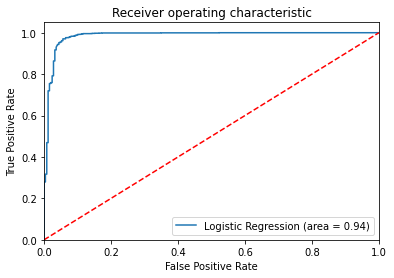

In [46]:
roc_plot(log_model, 'Logistic Regression')

Trying to classify new messages (1 - ham; 0 - spam)

In [47]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift! You can get it immediately!"])
                   
log_model.predict(msg)

array([0])

In [48]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

log_model.predict(msg)

array([1])

Messages are classified correctly.

### Naive Bayes classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline([('select_scale', pipe_select_scale),
                    ('classify', MultinomialNB())])

param_nb = {
    'classify__alpha': [0.5, 1, 10],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_nb = GridSearchCV(pipe_nb, param_nb, cv=10, scoring='f1')
cv_nb.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002481B7E1D30>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify', MultinomialNB())]),
             param_grid={'classify__alpha': [0.5, 1, 10],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [50]:
print(cv_nb.best_params_)
print(cv_nb.best_score_)

{'classify__alpha': 10, 'select_scale__select__k': 500}
0.969167076826376


Entire NB pipeline

In [51]:
nb_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 500)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", MultinomialNB(alpha = 10))]) 

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
f1_score_nb = f1_score(y_test, y_pred)
accuracy_score_nb = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_nb))
print("accuracy score: " + str(accuracy_score_nb))

f1 score: 0.9648337595907928
accuracy score: 0.9401848830886351


In [52]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.73090   0.88353   0.80000       249
           1    0.98114   0.94906   0.96483      1590

    accuracy                        0.94018      1839
   macro avg    0.85602   0.91630   0.88242      1839
weighted avg    0.94726   0.94018   0.94252      1839



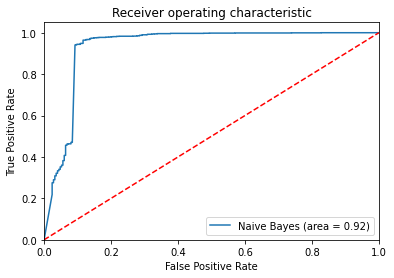

In [53]:
roc_plot(nb_model, 'Naive Bayes')

In [54]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
nb_model.predict(msg)

array([0])

In [55]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

### Support Vector Machine

In [56]:
from sklearn.svm import LinearSVC

pipe_svc = Pipeline([('select_scale', pipe_select_scale),
                     ('classify', LinearSVC(max_iter=10000, tol=0.1))])

param_svc = {
    'classify__C': [0.01, 0.1, 1],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_svc = GridSearchCV(pipe_svc, param_svc, cv=10, scoring='f1')
cv_svc.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002481B7E1D30>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify',
                                        LinearSVC(max_iter=10000, tol=0.1))]),
             param_grid={'classify__C': [0.01, 0.1, 1],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [57]:
print(cv_svc.best_params_)
print(cv_svc.best_score_)

{'classify__C': 0.1, 'select_scale__select__k': 5000}
0.9805969668820671


In [58]:
svc_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 5000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", LinearSVC(C = 0.1, max_iter=10000, tol=0.1))]) 

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
f1_score_svc = f1_score(y_test, y_pred)
accuracy_score_svc = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_svc))
print("accuracy score: " + str(accuracy_score_svc))

f1 score: 0.9821260583254938
accuracy score: 0.9690048939641109


In [59]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.90000   0.86747   0.88344       249
           1    0.97936   0.98491   0.98213      1590

    accuracy                        0.96900      1839
   macro avg    0.93968   0.92619   0.93278      1839
weighted avg    0.96862   0.96900   0.96876      1839



In [60]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
svc_model.predict(msg)

array([0])

In [61]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

### Perceptron

In [62]:
from sklearn.linear_model import Perceptron

pipe_per = Pipeline([('select_scale', pipe_select_scale),
                     ('classify', Perceptron(tol=1e-3, max_iter=1000, random_state=0))])

param_per = {
    'classify__eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'classify__alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_per = GridSearchCV(pipe_per, param_per, cv=10, scoring='f1')
cv_per.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002481B7E1D30>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify', Perceptron())]),
             param_grid={'classify__alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01,
                                             0.03],
                         'classify__eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [63]:
print(cv_per.best_params_)
print(cv_per.best_score_)

{'classify__alpha': 0.0001, 'classify__eta0': 0.001, 'select_scale__select__k': 500}
0.9686332100699555


In [64]:
per_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 500)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", Perceptron(alpha = 0.0001, eta0 = 0.001, tol=1e-3, max_iter=1000, random_state=0))]) 

per_model.fit(X_train, y_train)

y_pred = per_model.predict(X_test)
f1_score_per = f1_score(y_test, y_pred)
accuracy_score_per = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_per))
print("accuracy score: " + str(accuracy_score_per))

f1 score: 0.9750710003155569
accuracy score: 0.957041870581838


In [65]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.82692   0.86345   0.84479       249
           1    0.97847   0.97170   0.97507      1590

    accuracy                        0.95704      1839
   macro avg    0.90270   0.91758   0.90993      1839
weighted avg    0.95795   0.95704   0.95743      1839



In [66]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
svc_model.predict(msg)

array([0])

In [67]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

**Comparing scores for 4 models:**

In [68]:
scores = {'f1-score': [f1_score_log, f1_score_nb, f1_score_svc, f1_score_per],
          'accuracy': [accuracy_score_log, accuracy_score_nb, accuracy_score_svc, accuracy_score_per]}

compare_scores = pd.DataFrame.from_dict(scores, orient='index',
                  columns=(['Logistic Regression', 'Naive Bayes Classifier', 'Support Vector Machine', 'Perceptron']))

compare_scores

,Logistic Regression,Naive Bayes Classifier,Support Vector Machine,Perceptron
f1-score,0.988118,0.964834,0.982126,0.975071
accuracy,0.979337,0.940185,0.969005,0.957042


Logistic Regression model performs better on the emails classification

### Task 1 - Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [70]:
tfidf = pipe_extract.fit_transform(emails)

Splitting emails into 2 clusters which may help to distinguish between spam and ham.

### K-means

In [71]:
kmeans = KMeans(n_clusters=2, random_state= 0, n_init =100)

In [72]:
list(zip(kmeans.fit_predict(tfidf), emails['text']))

[(0, 'Ok lar... Joking wif u oni...'),
 (0,
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"),
 (0, 'U dun say so early hor... U c already then say...'),
 (0, "Nah I don't think he goes to usf, he lives around here though"),
 (0,
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"),
 (0,
  'Even my brother is not like to speak with me. They treat me like aids patent.'),
 (0,
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"),
 (1,
  'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'),
 (1,
  'Had your mobile 11 months or more? U R entitled to Update to the la

### Agglomerative Clustering

In [73]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [74]:
list(zip(hac.fit_predict(tfidf.toarray()), emails['text']))

[(0, 'Ok lar... Joking wif u oni...'),
 (0,
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"),
 (0, 'U dun say so early hor... U c already then say...'),
 (0, "Nah I don't think he goes to usf, he lives around here though"),
 (0,
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"),
 (0,
  'Even my brother is not like to speak with me. They treat me like aids patent.'),
 (0,
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"),
 (0,
  'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'),
 (0,
  'Had your mobile 11 months or more? U R entitled to Update to the la

K-means performs better that agglomerative clustering. However, classification is much more powerful tool in terms of identifying spam/ham.

As a result of clustering, spam/ham are often assigned to the same cluster.

### Task 2 - Topic modelling

A smaller dataset is preferable because Topic Modelling with LDA requires some  computational capacity.

Dataset: 20 BBC news articles on the following 5 topics: Protests in Belarus, Covid, War in Syria, Animals, Archeology

Data scraping and pre-processing

In [75]:
from urllib import request
from bs4 import BeautifulSoup

In [76]:
def extract_text(a):
    response = request.urlopen('https://www.bbc.com/news/' + a)
    html = response.read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    text = raw.replace('\n',' ')
    return text

In [77]:
l = ['world-asia-india-56206004', 'world-africa-56180161', 'world-us-canada-56221371', 'world-asia-56156234',
    'world-europe-56109750', 'world-europe-54961111', 'world-europe-54989508', 'world-europe-54953599',
    'world-europe-56222992', 'world-europe-jersey-56195939', 'uk-england-cambridgeshire-56116411', 'world-europe-isle-of-man-56111192',
    'world-asia-india-56224144', 'world-europe-55175734', 'world-europe-54353907', 'world-europe-54599913',
    'world-middle-east-56205056', 'world-middle-east-56185976', 'world-middle-east-55977964', 'world-middle-east-55887870']
articles = []
for i in l:
    text = extract_text(i)
    articles.append(text)

In [78]:
df = pd.DataFrame(articles, columns =['text'])
df

text
0                                         Covid-19: India in a 'delicate phase' of its coronavirus battle as cases surge - BBC NewsBBC HomepageSkip to contentAccessibility HelpBBC AccountHomeNewsSportReelWorklifeTravelFutureCultureMenuMoreSearchHomeNewsSportReelWorklifeTravelFutureCultureMusicTVWeatherSoundsClose menuBBC NewsMenuHomeCoronavirusVideoWorldUKBusinessTechScienceStoriesEntertainment & ArtsHealthMoreWorld News TVIn PicturesReality CheckNewsbeatLong ReadsAsiaChinaIndiaCovid-19: India in a 'delicate phase' of its coronavirus battle as cases surgePublished1 day agoSharecloseShare pageCopy linkAbout sharingRelated TopicsCoronavirus pandemicimage copyrightGetty Imagesimage captionHealthcare workers are worried abut another waveAfter reporting a significant drop in the number of Covid-19 cases for months, some Indian states have seen a sharp uptick in infections in February. The BBC's Vikas Pandey and Soutik Biswas report.In early February, physicians in Amravati district, some 700km (435 miles) from India's commercial capital, Mumbai, noticed a sudden surge in the number of people suffering from Covid-19.Life in this cotton-growing district in the western state of Maharashtra had almost returned to normal after the first wave of infections last summer. The ICUs of the 1,600-bed state-run hospital and half-a-dozen private hospitals were nearly empty. "But everything changed in February," says Anil Jadhav, a local journalist. "And now there's panic in the district." Since the beginning of February, Amravati has recorded more than 10,000 cases and over 66 deaths from Covid. More than 1,000 were receiving treatment for the disease this week. The positivity rate is in frightful double digits. Amravati and a few other districts in Maharashtra have been again locked down.The hotspots in a district of 2.5 million people are mainly congested urban areas, say locals. "We really don't know what the cause of the surge is. What is worrying is that entire families are getting infected. This is a completely new trend," Dr Shyamsunder Nikam, civil surgeon of the district, says.A number of neighbouring districts have also seen a sharp uptick in cases and Maharashtra recorded nearly 9,000 cases on Thursday, the largest single-day spike in four months. It reported 80 deaths on the same day. "People here have been not wearing masks. They have been attending unregulated mass gatherings such as marriages and campaigns for local elections. There is free intermingling of people, carriers are not getting isolated, and testing and tracking is low. This has led to this situation," Dr Sanjay Oak, a member of the state's Covid task force, told the BBC.It's not just Maharashtra where cases have grown recently. Some areas in Kerala, Karnataka, Telangana, Madhya Pradesh, Chhattisgarh and Punjab states have also reported surges. This comes at a time when much of India is reporting a sharp fall in cases - with daily infections for the county falling to less than 20,000 from a peak of over 90,000 in September.And that has baffled scientists, disease modellers and epidemiologist. The most common reasons given for the spikes in some states are the same as in Maharashtra - big weddings, people not wearing masks, reopening of cinema halls, gyms and swimming pools, and large political rallies in states like West Bengal where elections are due soon.image copyrightGetty Imagesimage captionMarkers have become crowded again and social distancing norms are not strictly followedIs India staring at a new Covid wave?Epidemiologist Dr Lalit Kant says a "false sense" of normalcy has "swept the country"."We cannot afford to drop our guard and we have to be cautious about opening places of mass gatherings. Testing, tracing and isolation has to be again scaled up massively in all states - we cannot wait for things to get worse."Dr Kant adds that the rise in the number of cases in some states was expected because it followed the global pattern. "We have seen spikes in 

In [79]:
text_clean = pipe_cleaning.fit_transform(df)
vec = TfidfVectorizer(ngram_range=(1,2)) #use unigrams and bigrams
features = vec.fit_transform(text_clean)
print(features.shape)
vocabulary=np.array(vec.get_feature_names())

(20, 10141)


In [80]:
vocabulary

array(['abandon', 'abandon animals', 'abandoned', ..., 'zoom trial',
       'zoos', 'zoos permanent'], dtype='<U142')

**Method 1**: Topic modelling using scikit-learn LDA

In [81]:
# Chose 5 topics 
from sklearn.decomposition import LatentDirichletAllocation
topic_number = 5
lda_model=LatentDirichletAllocation(n_components=topic_number,
                                    max_iter=500,
                                    max_doc_update_iter=50,
                                    learning_method='online',
                                    learning_offset=50,
                                    random_state=42)

In [82]:
document_topics=lda_model.fit_transform(features)

In [83]:
document_topics.shape

(20, 5)

In [84]:
# Extracting the most important 15 terms for each topic
topic_terms=lda_model.components_
top_terms=15 
topic_key_terms_idxs=np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterms=vocabulary[topic_key_terms_idxs]
topics=[', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth',-1)
topics_df=pd.DataFrame(topics,columns=['Term per Topic'], index=['Topic'+str(t) for t in range(1,topic_number+1)])
topics_df

<ipython-input-84-1f0a5d649887>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,Term per Topic
Topic1,"us, protesters, belarus, children, strike, journalists, belsat, police, lukashenko, tv, iraqi, bbc, said, figure, november"
Topic2,"boar, carriages, palmyra, syria, archaeologist, city, wild, police, group, bbc, trade, killed, rome, jihadists, sdf"
Topic3,"belarus, police, vaccine, said, korea, bill, bbc, cases, people, new, vaccines, news, animals, chariot, election"
Topic4,"man, bronze age, bronze, animal, bird, owner, jersey, bbc, age, viking, rare, isle, cockfight, find, police"
Topic5,"newsletterswhy, kong, homepageskip contentaccessibility, fire protestsat, approach external, arizona, policycookiesaccessibility helpparental, october, police try, try, agotrump, kong charges, smart, poverty news, happened arizona"


In [85]:
# Max probability among the terms for each topic
dt_df=pd.DataFrame(document_topics,columns=['T'+str(i) for i in range(1,topic_number+1)])
pd.options.display.float_format='{:,.5f}'.format
pd.set_option('display.max_colwidth',200)
max_contrib_topics=dt_df.max(axis=0)
dominant_topics=max_contrib_topics.index
contrib_perc=max_contrib_topics.values
document_numbers=[dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0] for t in dominant_topics]
results_df=pd.DataFrame({'Dominant Topic':dominant_topics,'Contribution%':contrib_perc, 'Answer Num': document_numbers,'Topic':topics_df['Term per Topic']})
results_df

,Dominant Topic,Contribution%,Answer Num,Topic
Topic1,T1,0.97036,6,"us, protesters, belarus, children, strike, journalists, belsat, police, lukashenko, tv, iraqi, bbc, said, figure, november"
Topic2,T2,0.97069,19,"boar, carriages, palmyra, syria, archaeologist, city, wild, police, group, bbc, trade, killed, rome, jihadists, sdf"
Topic3,T3,0.97565,5,"belarus, police, vaccine, said, korea, bill, bbc, cases, people, new, vaccines, news, animals, chariot, election"
Topic4,T4,0.96338,11,"man, bronze age, bronze, animal, bird, owner, jersey, bbc, age, viking, rare, isle, cockfight, find, police"
Topic5,T5,0.01045,13,"newsletterswhy, kong, homepageskip contentaccessibility, fire protestsat, approach external, arizona, policycookiesaccessibility helpparental, october, police try, try, agotrump, kong charges, sma..."


We can analyze the keywords and see that:

- Overall, topics covered are related to Covid; Archeology; Protests in Belarus; Animals (assignment of keywords to each specific topic depends on the random state and may be different in different runs).
- Max probability among the terms for each (or almost each) topic is high

**Method 2**: Topic modelling using gensim Dictionary, LDA and pyLDAvis

In [86]:
# Create corpus with unigrams
texts = []
for x in df['text']:
    tok = [w for w in word_tokenize(x.lower())
              if w.isalpha() and w not in stopword]
    texts.append(tok)
print(texts)

[['india', 'phase', 'coronavirus', 'battle', 'cases', 'surge', 'bbc', 'newsbbc', 'homepageskip', 'contentaccessibility', 'helpbbc', 'accounthomenewssportreelworklifetravelfutureculturemenumoresearchhomenewssportreelworklifetravelfutureculturemusictvweathersoundsclose', 'menubbc', 'newsmenuhomecoronavirusvideoworldukbusinesstechsciencestoriesentertainment', 'artshealthmoreworld', 'news', 'tvin', 'picturesreality', 'checknewsbeatlong', 'india', 'phase', 'coronavirus', 'battle', 'cases', 'day', 'agosharecloseshare', 'pagecopy', 'linkabout', 'sharingrelated', 'topicscoronavirus', 'pandemicimage', 'copyrightgetty', 'imagesimage', 'captionhealthcare', 'workers', 'worried', 'abut', 'another', 'waveafter', 'reporting', 'significant', 'drop', 'number', 'cases', 'months', 'indian', 'states', 'seen', 'sharp', 'uptick', 'infections', 'february', 'bbc', 'vikas', 'pandey', 'soutik', 'biswas', 'early', 'february', 'physicians', 'amravati', 'district', 'miles', 'india', 'commercial', 'capital', 'mumba

In [87]:
import gensim
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [88]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absence', 1),
  ('abut', 1),
  ('accounthomenewssportreelworklifetravelfutureculturemenumoresearchhomenewssportreelworklifetravelfutureculturemusictvweathersoundsclose',
   1),
  ('adds', 2),
  ('advises', 1),
  ('afford', 1),
  ('africa', 1),
  ('agofeaturesa', 1),
  ('agohong', 1),
  ('agosharecloseshare', 1),
  ('agotrump', 1),
  ('agrees', 1),
  ('ahead', 1),
  ('alertscontact', 1),
  ('allow', 1),
  ('almost', 1),
  ('also', 4),
  ('amravati', 4),
  ('analysis', 1),
  ('anil', 1),
  ('another', 2),
  ('antibodies', 1),
  ('approach', 1),
  ('areas', 2),
  ('arizona', 1),
  ('around', 1),
  ('art', 1),
  ('artshealthmoreworld', 1),
  ('astrazeneca', 1),
  ('attending', 1),
  ('attribute', 2),
  ('awardslonging', 1),
  ('away', 1),
  ('back', 1),
  ('bad', 2),
  ('baffled', 1),
  ('bangaloredr', 1),
  ('battle', 2),
  ('battling', 1),
  ('bbc', 5),
  ('bbcadvertise', 1),
  ('bbcget', 1),
  ('bbclyrics', 1),
  ('bbcprivacy', 1),
  ('beauty', 1),
  ('become', 1),
  ('beginning', 1

In [89]:
# Build LDA model with gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                           random_state = 42)

In [90]:
#print 10 keywords for each topics 

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.012*"bill" + 0.007*"us" + 0.007*"biden" + 0.006*"house" + 0.006*"said" + 0.006*"covid" + 0.006*"wage" + 0.006*"minimum" + 0.005*"democrats" + 0.005*"senate"')
(1, '0.009*"korea" + 0.008*"boar" + 0.007*"police" + 0.006*"people" + 0.005*"bbc" + 0.005*"coronavirus" + 0.005*"south" + 0.004*"news" + 0.004*"said" + 0.004*"wild"')
(2, '0.009*"vaccine" + 0.008*"cases" + 0.008*"countries" + 0.007*"india" + 0.007*"vaccines" + 0.006*"new" + 0.006*"people" + 0.005*"doses" + 0.005*"states" + 0.005*"covax"')
(3, '0.012*"police" + 0.009*"said" + 0.007*"bbc" + 0.006*"news" + 0.006*"new" + 0.006*"us" + 0.006*"belarus" + 0.005*"people" + 0.005*"leader" + 0.004*"day"')
(4, '0.009*"bbc" + 0.007*"police" + 0.007*"news" + 0.006*"said" + 0.005*"found" + 0.005*"people" + 0.005*"new" + 0.005*"like" + 0.004*"external" + 0.004*"day"')


We can analyze the keywords and see that:

- Overall, topics covered are related to Covid; Archeology; Protests in Belarus; Animals (assignment of keywords to each specific topic depends on the random state and may be different in different runs).

In [91]:
# Visualize the topics

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
3     -0.09123  0.07447       1        1 36.96546
4     -0.07678 -0.09237       2        1 32.18662
2      0.11457 -0.00855       3        1 14.66059
1      0.01995  0.01509       4        1 10.28566
0      0.03348  0.01136       5        1  5.90167, topic_info=         Term     Freq    Total Category  logprob  loglift
1040       us 31.00000 31.00000  Default 30.00000 30.00000
510   vaccine 18.00000 18.00000  Default 29.00000 29.00000
842      bill  8.00000  8.00000  Default 28.00000 28.00000
1146    korea 10.00000 10.00000  Default 27.00000 27.00000
840     biden 11.00000 11.00000  Default 26.00000 26.00000
...       ...      ...      ...      ...      ...      ...
352    police  1.65454 85.64374   Topic5 -5.96120 -1.11670
343    people  1.63238 56.57556   Topic5 -5.97470 -0.71560
313      news  1.63086 63.07572   Topic5 -5.97560 -0.82530
254    leader  1.62308 40.12420   Topic5 -5.98040 -0.37770
260      like  1.61734 45.32698   Topic5 -5.98400 -0.50320

[343 rows x 6 columns], token_table=      Topic    Freq     Term
term                        
6         2 0.22615   africa
6         3 0.67844   africa
554       3 0.69979  african
822       2 0.92589      age
822       5 0.10288      age
...     ...     ...      ...
544       1 0.33799     year
544       2 0.29574     year
544       3 0.12675     year
544       4 0.21124     year
544       5 0.04225     year

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 2, 1])

### Task 3 - Text Summarization

We will use gensim summarization and gensim Word2Vec embeddings and PageRank to summarize an article about Protests in Belarus

Article: https://www.bbc.com/news/world-europe-54961111

In [92]:
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import re
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx

In [93]:
article = extract_text('world-europe-54961111')

**Method 1:** Applying gensim summarize function: summary is satisfactory and may be improved.

In [94]:
print(summarize(article, word_count=100))

Western governments have also condemned the widely reported election abuses and Mr Lukashenko's violent crackdown.image copyrightReuters/Tut.byimage captionThere has been no let-up in opposition protests since the disputed August election'It felt like World War Two'Alesya, a 31-year old worker in the IT industry, regularly attends the Sunday rallies.
Such groups are often seen working with police when they disperse and detain protesters.media captionPolice attacked protesters with stun grenades last monthAfter the election, unprecedented demonstrations took place in Minsk and other cities in Belarus - in the capital alone more than 100,000 thronged the streets.They demanded an end to police violence, the release of all political prisoners and new elections held transparently and fairly.


In [95]:
print('Keywords:')
print(keywords(article))

Keywords:
news
protest
people
new elections
opposition protests
despite police
days
day
belarus protesters
women
image
august
bbc
officers
presidential election
march
marches
rallies
rally
said
november
leader
leaders
year old
activist
globe
lukashenko
hours
prison
pogerilo
doctors
media
took
vladimir
stop
block
displays
streets
street
lifted
quickly
personalised
turned
turn
chase
slaps
minsk
political prisoners
try
festive
activists organise flash
regularly
stun
hit
started hitting
start
leadership style
world
like
external
sites
helpparental
policycookiesaccessibility
demonstrations
demonstrating
andrey
flags
years claims demonstrators
join
joined
joins
diana
copyrightgetty
widely
wide
brutality
singing
sing
remain
remains
remained
politics
okrestina
charge
charges
pensioners
awards
related
helpbbc
trade


**Method 2:** Applying gensim sentence embeddings to improve summary

In [96]:
#pre-processing the sentences
sentences=nltk.sent_tokenize(article)
sentences_clean=[re.sub(r'[^\w\s]','',sentence.lower()) for sentence in sentences]
stop_words = stopwords.words('english')
sentence_tokens=[[words for words in sentence.split(' ') if words not in stop_words] for sentence in sentences_clean]

In [97]:
#applying sentence_embeddings
w2v=Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
max_len=max([len(tokens) for tokens in sentence_tokens])
sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]

<ipython-input-97-f2bf91bd7fe6>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-97-f2bf91bd7fe6>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-97-f2bf91bd7fe6>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-97-f2bf91bd7fe6>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-97-f2bf91

In [98]:
#constructing similarity matrix for words 
similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])
for i,row_embedding in enumerate(sentence_embeddings):
    for j,column_embedding in enumerate(sentence_embeddings):
        similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)

In [99]:
#building a graph and calculating pagerank 
nx_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(nx_graph)

In [100]:
#retrieving top 10 sentences
top_sentence={sentence:scores[index] for index,sentence in enumerate(sentences)}
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:10])

In [101]:
for sent in sentences:
    if sent in top.keys():
        print(sent)

Officers tear-gas elderly people on a pensioners' march.
She was saved by a stranger who hid her and several others in his house.
He was arrested by men in plain clothes without insignia.
Women screamed and raised their hands, begging the police not to take them.
Before the August presidential election Mr Pogerilo had never been interested in politics.
He was in a cafe when the first clashes took place in Minsk that night.
That day police wanted to break people, not detain them."
Wide range of demonstratorsThere are now marches of students, doctors, pensioners, people with disabilities.
Their response to beatings is to turn up at the next rally carrying flowers.
The past 100 days have illustrated how powerful this peaceful approach is.


Second method shows better results. Summary covers the entire text and conveys the main idea of the article.